# Data Wrangling and Feature Scaling

- 데이터 랭글링은 데이터를 초기 형식에서 분석에 더 적합한 형식으로 변환하는 프로세스입니다.

## project example

### 디젤 자동차의 연비 (L/100k) 분석

다음 링크에서 "자동차 데이터 세트"를 찾을 수 있습니다.: https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

filename = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'

df = pd.read_csv(filename, names = headers)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


- 물음표는 결측치 표시

**누락된 데이터(결측치) 처리**

결측치 처리 단계:
1. 누락된 데이터 식별
2. 누락된 데이터 처리
3. 데이터 형식 수정

### Identify and handle missing values

- "?" 를 NaN 으로 변환

 <pre>.replace(A, B, inplace = True) </pre>

In [3]:
# replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Missing Data 평가

누락된 값은 Python의 기본값으로 변환됩니다. 우리는 이러한 누락된 값을 식별하기 위해 Python의 내장 함수를 사용합니다.

1.  **.isnull()**
2.  **.notnull()**

In [4]:
missing_data = df.isnull()
missing_data.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
missing_data.sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

## missing data 처리
** 누락 된 데이터를 처리하는 방법 : **
   
 1. 데이터 삭제  
         a. 전체 행을 삭제  
         b. 전체 열을 삭제  
     
     
 2. 데이터 교체  
         a. 평균으로 대체  
         b. 빈도수가 많은 것으로 대체  
         c. 기타 함수를 이용하여 교체  
     

- 평균으로 교체할 columns
    
    "normalized-losses", "stroke", "bore", "horsepower", "peak-rpm"

    
- 빈도수가 많은 것으로 대체할 column

    "num-of-doors": sedan의 84% 가 4 도어이므로 "four"로 대체
    
    
- Drop the whole row

    "price": 평균으로 대체할 수도 있으나 간단히 전체 행 삭제.    

### column의 평균 계산
- "normalized-losses", "bore", "stroke", "horsepower", "peak-rpm"은 "NaN" 을 열의 평균 값으로 바꿉니다.

In [6]:
avg_1 = df["normalized-losses"].astype("float").mean(axis = 0)
avg_2 = df['bore'].astype('float').mean(axis=0)
avg_3 = df['stroke'].astype('float').mean(axis=0)
avg_4 = df['horsepower'].astype('float').mean(axis=0)
avg_5 = df['peak-rpm'].astype('float').mean(axis=0)

df["normalized-losses"].replace(np.nan, avg_1, inplace = True)
df['bore'].replace(np.nan, avg_2, inplace= True)
df['stroke'].replace(np.nan, avg_3, inplace=True)
df['horsepower'].replace(np.nan, avg_4, inplace= True)
df['peak-rpm'].replace(np.nan, avg_5, inplace= True)                     

### 빈도수 check

In [7]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [8]:
df['num-of-doors'].value_counts().idxmax()

'four'

In [9]:
#가장 빈번한 값으로 대체
df["num-of-doors"].replace(np.nan, "four", inplace = True)

### 삭제할 column

In [10]:
# "가격" 열에 NaN이 있는 전체 행을 삭제
df.dropna(subset=["price"], axis=0, inplace = True)

# 행을 삭제했기 때문에 인덱스 재설정
df.reset_index(drop = True, inplace = True)

In [11]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## data format 교정

- 데이터 정리의 마지막 단계는 모든 데이터가 올바른 형식 (int, float, text 또는 기타)인지 확인하는 것입니다.

**.dtype()** - data type check  


**.astype()**- data type 변경 

In [12]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

### 데이터 유형을 적절한 형식으로 변환:

- 숫자 변수는 'float'또는 'int'유형을 가져야 하며 카테고리와 같은 문자열이 있는 변수는 'object'유형을 가져야 합니다.


- 숫자값 feature는 `astype()` 메소드를 사용하여 'float'또는 'int' type 으로 변환.  

In [13]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")

df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")

df[["price"]] = df[["price"]].astype("float")

df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [14]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

# Data Standardization (데이터 표준화)


- 표준화는 의미있는 비교를 할 수 있도록 데이터를 공통 형식으로 변환하는 프로세스

**Ex)** 
<div>mpg 를 L/100km로 변환:</div>

데이터 세트에서 연료 소비 열 "city-mpg" 및 "highway-mpg"는 mpg(갤런 당 마일 단위로 표시됩니다. L/100km 기준으로 연료 소비를 허용하는 국가에서 애플리케이션을 개발 중이라고 가정하면, mpg를 L/100km로 변환해야 합니다.

단위 변환 공식은 다음과 같습니다.  
L/100km = 235 / mpg 

In [15]:
df['city-L/100km'] = 235/df["city-mpg"]
df["highway-mpg"] = 235/df["highway-mpg"]

df.rename(columns={"highway-mpg":'highway-L/100km'}, inplace=True)

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556


# Data Normalization   

- 정규화는 여러 변수의 값을 유사한 범위로 변환하는 프로세스입니다. 일반적인 정규화에는 simple scaling, 변수 평균이 0 이고, 변수 분산이 1이 되도록 하는 Standard Scaling, 변수 값이 0에서 1 범위가 되도록 하는 MinMax Scaling 이 포함됩니다.

**Example**
<div>"length", "width" and "height" 를 0 과 1 사이로 normalize </div>

In [16]:
# replace (origianl value) by (original value)/(maximum value)

df['length'] = df['length'] / df['length'].max()
df['width']  = df['width']  / df['width'].max()
df['height'] = df['height'] / df['height'].max()

In [17]:
df[['length', 'width','height']].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


#  Binning


- binning은 그룹화 된 분석을 위해 연속 숫자 변수를 이산 범주 형 'bin'으로 변환하는 프로세스입니다.

**Example:**   
"horsepower" 48 to 288 사이의 변수이고 57 개의 unique value 를 가지고 있는데 이 것을 3 개의 type 으로 구분

In [18]:
df["horsepower"] = df["horsepower"].astype(float)

- pd.cut 함수를 이용하여 bandwidth가 동일한 4 개의 bin으로 구분. "cut" 함수에 맨 오른쪽 값이 포함되기 때문에 숫자는 4개 지정.

In [19]:
binwidth = (max(df["horsepower"])-min(df["horsepower"]))/4
binwidth  

53.5

In [20]:
bins = np.arange(min(df["horsepower"]), max(df["horsepower"]), binwidth)
bins

array([ 48. , 101.5, 155. , 208.5])

In [21]:
group_names = ['Low', 'Medium', 'High']

df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )

df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111.0,Medium
1,111.0,Medium
2,154.0,Medium
3,102.0,Medium
4,115.0,Medium
5,110.0,Medium
6,110.0,Medium
7,110.0,Medium
8,140.0,Medium
9,101.0,Low


## Bins visualization 

- "horsepower" 특성을 bins=3 으로 historgram 작성 

Text(0.5, 1.0, 'horsepower bins')

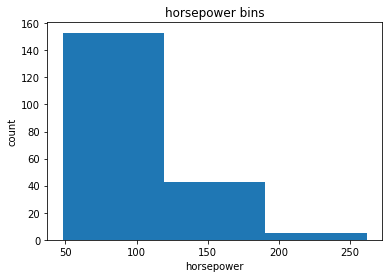

In [22]:
plt.hist(df["horsepower"], bins = 3)

plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

## Indicator variable (or dummy variable)

### indicator variable

 - 범주에 레이블을 지정하는 데 사용되는 숫자 변수.

In [23]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,8.703704,13495.0,11.190476,Medium
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,8.703704,16500.0,11.190476,Medium
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154.0,5000.0,19,9.038462,16500.0,12.368421,Medium
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102.0,5500.0,24,7.833333,13950.0,9.791667,Medium
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115.0,5500.0,18,10.681818,17450.0,13.055556,Medium


In [24]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])

dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [25]:
dummy_variable_1.columns

Index(['diesel', 'gas'], dtype='object')

In [26]:
df = pd.get_dummies(df, columns=["fuel-type", 'aspiration'])
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,8.703704,13495.0,11.190476,Medium,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,8.703704,16500.0,11.190476,Medium,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,5500.0,24,7.833333,13950.0,9.791667,Medium,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,5500.0,18,10.681818,17450.0,13.055556,Medium,0,1,1,0


## Feature Scaling

- 특정 feature 의 value 가 다른 feature 들 보다 훨씬 크면, 그 값이 목적함수를 지배하게 되므로 정확한 학습이 되지 않음

- sklearn 의 preprocessing module 은 scale, minmax_scale 함수와 이에 대응하는 StandardScaler, MinMaxScaler class 및 fit(), transform() method 를 제공하여 쉽게 scaling 을 할 수 있도록 지원

### 1) Simple Feature Scaling

$$ X_{new} = \frac{X_{old}}{X_{max}}$$

### 2) Min-Max Scaling

- 최대/최소값이 1, 0 이 되도록 scaling  
- x=min 이면 y=0, x=max 이면 y=1.


$$ X_{new} = \frac{X_{old} - X_{min}}{X_{max} - X_{min}}$$


### 3) Standard Scaling (Z-score)

- 평균과 표준편차를 이용하여 scaling  
- $\mu : 평균, \sigma : 표준편차 $

$$ X_{new} = \frac{X_{old} - \mu}{\sigma}$$


In [27]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import scale, minmax_scale

In [28]:
X = np.arange(-3, 6).astype('float32').reshape(-1, 1)
X = np.vstack([X, [20]])               # outlier 추가

In [29]:
X_simple = X/X.max()
X_simple

array([[-0.15],
       [-0.1 ],
       [-0.05],
       [ 0.  ],
       [ 0.05],
       [ 0.1 ],
       [ 0.15],
       [ 0.2 ],
       [ 0.25],
       [ 1.  ]])

In [30]:
#MinMaxScale
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X)
X_minmax

array([[0.        ],
       [0.04347826],
       [0.08695652],
       [0.13043478],
       [0.17391304],
       [0.2173913 ],
       [0.26086957],
       [0.30434783],
       [0.34782609],
       [1.        ]])

In [31]:
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)
X_standard

array([[-0.95099461],
       [-0.78980908],
       [-0.62862356],
       [-0.46743803],
       [-0.3062525 ],
       [-0.14506697],
       [ 0.01611855],
       [ 0.17730408],
       [ 0.33848961],
       [ 2.75627252]])

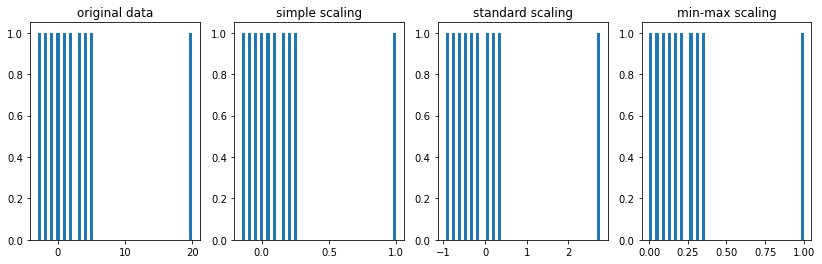

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(14,4))
plt.subplot(1,4,1)
plt.hist(X, bins=50);
plt.title('original data')

plt.subplot(1,4,2)
plt.hist(X_simple, bins=50);
plt.title('simple scaling')

plt.subplot(1,4,3)
plt.hist(X_standard, bins=50);
plt.title('standard scaling')

plt.subplot(1,4,4)
plt.hist(X_minmax, bins=50);
plt.title('min-max scaling');